In [ ]:
#@title
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np


def draw_graph(x_intercept=0, lim=1, x_line=False, loss=1):
  x=[]
  y=[]
  i = 0
  while(i<lim):
    if(loss):
      x.append(i)
      y.append(-np.log(i))
      i+=0.01
    else:
      x.append(i)
      y.append(-np.log(1-i))
      i+=0.01
  plt.plot(x,y)
  if(x_line):
    plt.axvline(x=x_intercept, color='Red')
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = 0 + 0 * x_vals
  plt.plot(x_vals, y_vals, '--')
  plt.xlabel('SIGMOID_RESULT')
  plt.ylabel('LOG (RESULT)')
  plt.show()

#Logistic regression:
- Why Logistic regression?
- The sigmoid function
- Logistic regression loss function


Imagine you were given a task to classify a patient as either covid +ve or -ve based on their body temperature (A severely flawed attribute, but, should do fine for the example).

Let us try to plot a graph where the X-axis represents the temperature, and the Y-axis represents wether the result is either is +ve or -ve

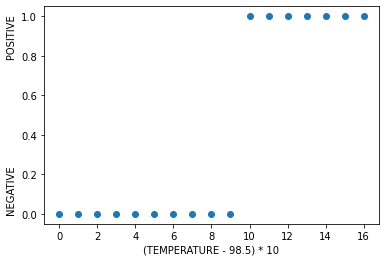

In [ ]:
#@title
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(x, y)
plt.xlabel('(TEMPERATURE - 98.5) * 10')
plt.ylabel('NEGATIVE                                  POSITIVE')
plt.show()

The classes can either be 0, or 1. Let us take 0.5 as our threshold value. Anything below 0.5 can be considered 0, and anything equal to or above 0.5 can be considered 1.
\
\
Let us use Linear regression to FIT a line to the data.

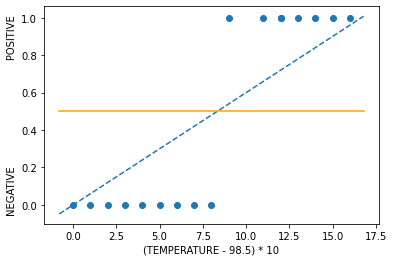

In [ ]:
#@title

x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 12, 13, 14, 15, 16]
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(x, y)
plt.xlabel('(TEMPERATURE - 98.5) * 10')
plt.ylabel('NEGATIVE                                  POSITIVE')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + 0.06 * x_vals
plt.plot(x_vals, y_vals, '--')
y_vals = 0.5 + 0 * x_vals
plt.plot(x_vals, y_vals, color='Orange')
plt.show()


We see that the model performs reasonably well for classifying the data.(Anything above the ORANGE line is POSITIVE, anything below the ORANGE line is NEGATIVE)
\
\
Now, let us assume that our dataset consisted of JUST one extra value representing a HIGH temperature.

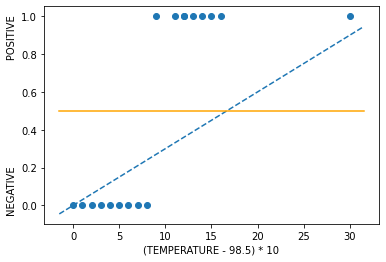

In [ ]:
#@title

x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 12, 13, 14, 15, 16, 30]
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(x, y)
plt.xlabel('(TEMPERATURE - 98.5) * 10')
plt.ylabel('NEGATIVE                                  POSITIVE')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + 0.03 * x_vals
plt.plot(x_vals, y_vals, '--')
y_vals = 0.5 + 0 * x_vals
plt.plot(x_vals, y_vals, color='Orange')
plt.show()

We see that Linear regression is EASILY swayed by the data points. The slope of the line is drastically affected by this, which in turn shifts the threshold. The new line WRONGLY classifies MOST of the data points.
\
\
Also, it is visible that the regression line stretches to infinity. Even though our labels can ONLY be either 0 or 1, we are not placing a cap on the values that the regression algorithm produces.
\
\
For a temperature value beyond 30, you can imagine the regression output to be more than 1.0. Although you can argue that as long as the output is more than 0.5, it is always labeled as POSITIVE, it simply makes little sense to NOT limit the regression output.
\
\
How would we solve these problems? Can we simply rely on the quality of data alone and proceed with Linear Regression? No.
\
\
We need something better that can address the problems stated above.
- An algorithm that isn't as sensitive to outlier data as Linear regression is
- An algorithm that stretches ONLY between 0 - 1.

**NOTE**: In binary classification problems, the POSITIVE class is usually labeled as 1.

**Example**: If we are designing a model to detect heart patients, the patient with heart disease is labeled as 1. The patients without heart disease are labeled as 0.


**NOTE**: Think of 0-1 as the range of probabilty, Higher the probability score, more confident is the prediction.
\
**Example**: For a particualr body temperature, if the corrsponding Y-axis value is 0.7, it means that the model is 70% sure that the paitent is COVID +ve

# LOGISTIC REGRESSION !!
Now, if we were going to use the logistic regression model to solve the above problem, it would look like this:

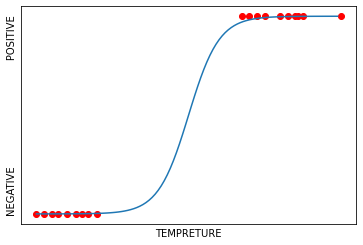

In [ ]:
#@title

import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x=[-10, -9.5, -9, -8.6, -8, -7.4, -7, -6.6, -6, 3.5, 4, 4.5, 5, 6, 6.5, 7, 7.2, 7.5, 10]
y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.scatter(x, y, color='Red')

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.xlabel('TEMPRETURE')
plt.ylabel('NEGATIVE                                  POSITIVE')
plt.show()

It is evident that logistic regression solves both of our problems:
- It provides good results even in the presence of outliers
- The results of the model range from 0 to 1.

The main question should be, how are we getting the curvy line?
\
\
We use the Sigmoid function to squeeze the line to fit between 0 and 1. Imagine taking a long iron rod and bending the ends to face away from each other.

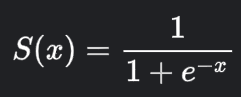

What we have learned so far:
- classification problems cannot be modeled accurately using good old Linear regression
- Linear regression is HIGHLY SENSITIVE to outlier data. The slope of the line is easily swayed towards extremes.
- Linear regression line extends from NEGATIVE INFINITY to POSITIVE INFINITY, while classification results vary only between 0 and 1.
- In classification problems, POSITIVE OUTCOME (For which the model was designed) is usually labeled as 1.
- Given the input data, the output of the classification model provides us with the probability of the outcome being 1. (between 0 to 1)
- We can use Logistic Regression to model a classification problem.
- Logistic regression uses the Sigmoid function, which ensures that the results range between 0-1 and that it isn't as sensitive to outliers.

**VERY IMPORTANT NOTE**:
\
The output of the logistic regression model **ALWAYS** gives us the confidence of the input sample being labeled 1.
\
\
EXAMPLE: Let us consider the model for predicting COVID patients. For a patient with temperature x degrees, if the model outputs a result of 0.3
\
It means that the MODEL is 30% sure that the patient is COVID +ve
\
OR
\
It can also be interpreted as the model being 70% sure that the patient is COVID -ve.

Recall Linear regression. If we were to FIT a LINE to this data, what would the equation look like?
\
\
Y = Slope * X + Intercept
\
\
In the above equation, the parameters to be modified are the intercept and the slope. X represents the input data, which in this case is the temperature.
\
\
More generally, it can be written as:
\
\
Y = P1 + P2 * X
\
\
Where P1 and P2 are the parameters to be tuned, and X is the input.
\
\
Now, imagine that if I were to tell you that to better identify if a person is COVID +ve or not, I will also provide you with the immunity levels of the patient.
\
\
Hence, the equation can be modified to:
\
\
Y = P1 + P2 * X1 + P3 * X2
\
\
X1 = tempreture
\
X2 = immunity levels
\
\
As the number of input parameters increases, so do the model parameters.

What we described above also applies to Logistic regression, but, unlike Linear Regression, we need to squeeze it to fit within 0 and 1.
\
\
Imagine you lived in a 2BHK house. You own a TV set, a SOFA, and 16 pairs of clothes. Because of the soaring rent prices, you decide to move into a smaller apartment. You were able to successfully FIt your TV set, SOFA, and the 16 pairs of clothes in a smaller home. Essentially, even with the added advantage of lower rent prices, and maintenance, you are still PRESERVING the contents of the bigger 2BHK home.
\
\
You can imagine the logistic function of doing something similar. At its core, it is still a regression algorithm, but, it uses the sigmoid function as an extra step, to restrict its output between 0-1. That is, shrinking it while preserving its meaning. The sigmoid function is called a non-linearity.

For our COVID prediction example given the tempreture, the equation would be:
\
Y = P1 + P1*X
\
\
We need to feed this into the sigmoid function in order to shrink it.

Visually, the sigmoid function can be represented as:
\
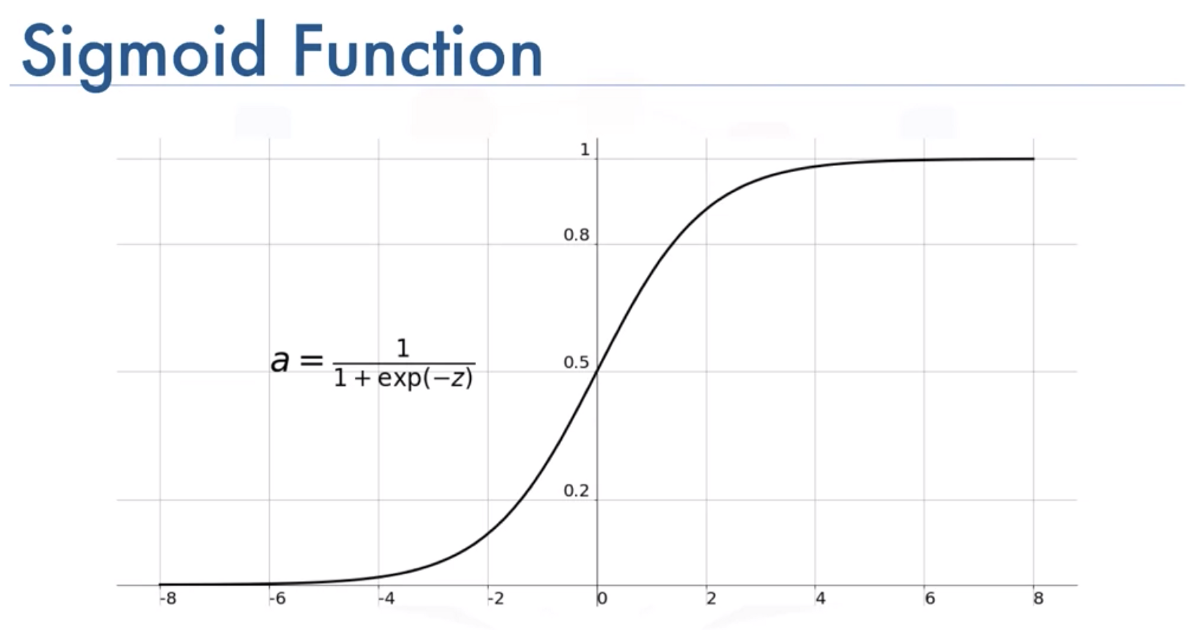

Here, Z is P1 + P2*X
\
\
The value of the sigmoid function is plotted on the Y-AXIS, for corresponding X-AXIS values for the input Z.
\
\
Key takeaways:
- It is clear that when Z is 0, the output of the sigmoid is 0.5 (or 50%).
- For values of Z greater than 0, the sigmoid function outputs a confidence score greater than 0.5 (>50%)
- For values of Z less than 0, the sigmoid function outputs a confidence score less than 0.5 (<50%)

Based on your threshold score, you can classify the output to be either POSITIVE or NEGATIVE
\
\
**NOTE**: Please refer to the notebook on ML_METRICS for a better intuition as to how you can choose your threshold values.


---



# LOSS FUNCTION:
Just like Linear regression, the next steps to building a logistic regression model are:
- Formulate the loss function.
- For each of the parameters, find the value which minimizes the loss function. That is, the value where the slope is equal to 0 (By taking partial derivatives)

Let us tackle the first step.
\
\
Can we reuse the same loss function as we did for Linear regression (least-squares error)?
\
\
Well, why fix something that isn't broken?

Let us go back to the house relocation example.
\
\
You had decided to move to a smaller 1BHK apartment so that you can minimize your rental expenditure. Imagine that you wanted to relocate to MG Road. There are 7 different apartments in that area. You decide to pick one of the 7 apartments and begin to search for a 1BHK with the lowest cost. Sure enough, you find the lowest costing 1BHK in that apartment. The movers constantly keep pestering you to give the drop-off address, so that they can move your furniture and finish the job. This annoys you and you decide to halt your search after just one single apartment. You definitely got a really good deal RELATIVE to the prices of other flats in that apartment.
\
\
But, can you be sure that this is the best deal? What if apartment number 2, right across the street was offering a 1BHK at a much lower price than what you settled for? If so, then we were unable to find the optimum price.
\
\
What you just learned was the principle of LOCAL and GLOBAL OPTIMUM.
\
**LOCAL OPTIMUM** - The optimum solution within your limited search area. In this example, it is the cheapest 1BHK flat within Apartment 1.
\
**GLOBAL OPTIMUM** - The optimum solution globally. In this example, you can imagine the global optimum to be the cheapest 1BHK flat in that area (Inclusive of all seven apartments)
\
\
\
Now, imagine the same scenario where the movers are constantly bugging you. Nothing changes, you still decide to halt your search after just one apartment.
\
But, let us assume that the 1 single apartment has the best features of ALL the SEVEN APARTMENTS. In such a case can you be sure that you are getting the best deal?
\
\
YES! In the second case, where the single apartment is the best of ALL THE SEVEN APARTMENTS, there is EXACTLY ONE OPTIMUM SOLUTION. That is the LOCAL OPTIMUM = GLOBAL OPTIMUM.
\
\
**Global optimum leaves no room for ambiguity regarding the presence of a better solution.**
\
\
What we just learn was the main difference between **CONVEX** and **NON-CONVEX optimization**.

# NON-CONVEX optimization:
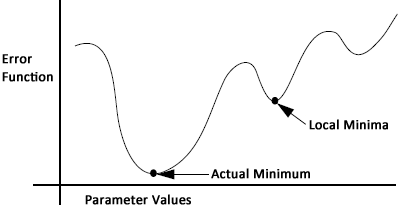
\
We know that optimizers such as gradient descent STOP once they encounter the point where the SLOPE is 0. In the above graph, it is clear that there are THREE different points where the slope is equal to 0. Of the THREE only ONE is the **GLOBAL OPTIMUM** ( The lowest DIP). But, gradient descent has no information regarding the existence of multiple minimums. It just STOPS once it encounters a 0 slope point.
\
\
There is absolutely no guarantee if the solution provided by the gradient descent algorithm is the LOCAL or GLOBAL OPTIMUM.

# CONVEX OPTIMIZATION:
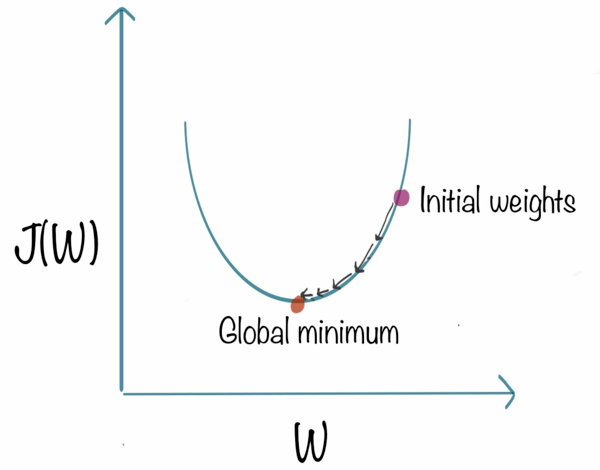

In CONVEX optimization, there is EXACTLY ONE OPTIMUM SOLUTION, which happens to be the global optimum solution.

\
\
\
Now, returning to our choice of LOSS FUNCTION for Logistic Regression, we CAN NOT use Least Squares Loss because, for logistic regression, it produces a NON-CONVEX optimization curve. There is NO guarantee that we will land on the best solution.
\
\
Why? without getting into the details, you can see that the LSE was designed for regression outputs that extend from -Infinity, to +Infinity. But, the outputs of the LOGISTIC REGRESSION vary ONLY from 0 - 1. It simply does not make sense for us to port the loss functions without expecting a dip in performance. Almost like trying to fit your bicycle tires onto a car.


---



**LOGISTIC REGRESSION LOSS FUNCTION FOR CONVEX OPTIMIZATION:**
\
\
\
For logistic regression, the classes can either be 0, or 1.
\
\
**LOSS When the actual label is 1:**
\
\
Z = P1 + P2 * X
\
Result = Sigmoid(Z) (**NOTE**: Result ALLWAYS varies from 0 - 1)
\
**LOSS = -Log(Result)**
\
\
Let us demystify the above equation.



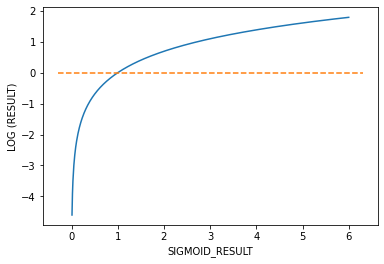

In [ ]:
#@title

x=[]
y=[]
i = 0.01
while(i<6):
  x.append(i)
  y.append(np.log(i))
  i+=0.01
plt.plot(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + 0 * x_vals
plt.plot(x_vals, y_vals, '--')
plt.xlabel('SIGMOID_RESULT')
plt.ylabel('LOG (RESULT)')
plt.show()

**IMPORTANT NOTE:**
The terms COST and LOSS are used interchangeably. They both represent the Y-axis value, which we want to minimize.
\
\
The above graph represents the LOG function = Log(Result).
\
\
**Takeaways:**
- The LOG function tends to -∞ when the Result nears 0.
- The LOG function crosses over to +ve when the result is equal to 1 and remains relatively flat.

We are ONLY interested in the section of the result between 0 and 1. Why? Because the LOGISTIC REGRESSION only produces results in that range.
\
\
The graph filtered between 0-1

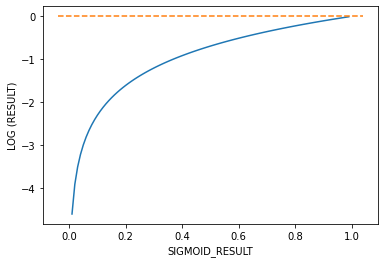

In [ ]:
#@title

x=[]
y=[]
i = 0.01
while(i<1):
  x.append(i)
  y.append(np.log(i))
  i+=0.01
plt.plot(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + 0 * x_vals
plt.plot(x_vals, y_vals, '--')
plt.xlabel('SIGMOID_RESULT')
plt.ylabel('LOG (RESULT)')
plt.show()

The above graph represents the LOG(Result) when the results are between 0 and 1.
\
\
But, we want the -LOG(Result). Hence, we flip the above graph along the X-AXIS:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


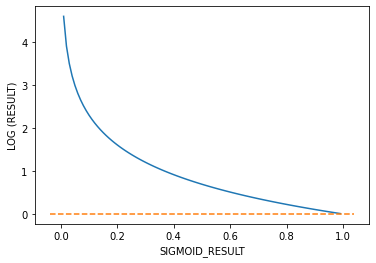

In [ ]:
#@title

draw_graph(lim=1, loss=1)

The Y-AXIS represents the loss for the inputs with label 1.
\
\
Let us take an example to better understand how the LOSS works.
\
\
If we were to classify a patient who is COVID +ve with a score of 0.2 (In other words, the model is 20% sure that the patient is indeed COVID +VE)
\
Then:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


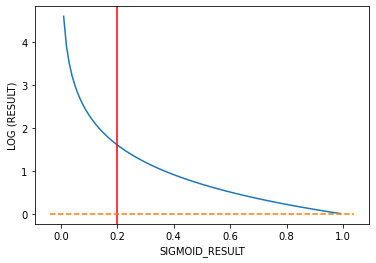

In [ ]:
#@title

draw_graph(lim=1, loss=1, x_line=True, x_intercept=0.2)

The LOSS would be 1.8.
\
\
Now, let us see what would be the loss if our model labeled the same example with higher confidence of 0.8 (80%)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


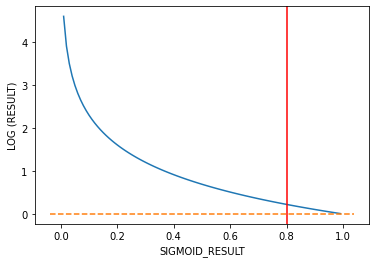

In [ ]:
#@title

draw_graph(lim=1, loss=1, x_line=True, x_intercept=0.8)

We see that the corresponding LOSS is very low (~0.3)
\
\
**Takeaways:**
- When a sample is indeed +ve, and if the model predicts with a LOW confidence score, then it will be penalized with a HIGH COST.

- the COST/LOSS will be 0 When the model predicts a POSITIVE input with a confidence score of 1(100%) (prediction result = Actual label = 1).
- Similarly,the COST will be the HIGHEST when the model predicts a POSITIVE input with a confidence score of 0.

**LOSS When the actual label is 0:**
\
Z = P1 + P2 * X
\
Result = Sigmoid(Z) (**NOTE**: Result ALLWAYS varies from 0 - 1)
\
LOSS = Log(1 - Result)
\
\
We can see that the LOSS function is VERY similar to the loss when the label was 1. Except, because we are taking the Log(1 - Result), we need to flip it along the Y-AXIS


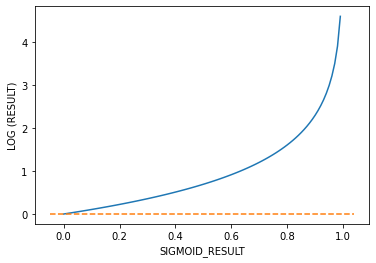

In [ ]:
#@title

draw_graph(lim=1, loss=0)

Let us take an example to better understand how the LOSS works when the label is 0.
\
\
If we classify a patient who is COVID -ve with a score of 0.9 (90%), then this will result in a very HIGH loss. The model is highly confident that the patient is COVID +ve when in reality the patient is -ve.

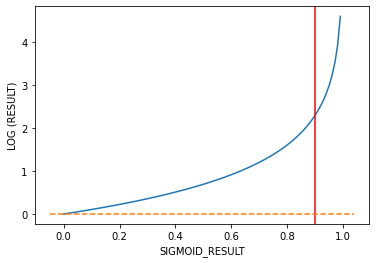

In [ ]:
#@title

draw_graph(lim=1, loss=0, x_line=True, x_intercept=0.9)

The LOSS is around 2.2
\
\
Now, let us see what would be the loss if our model labeled the same example with lower confidence of 0.2 (20%)

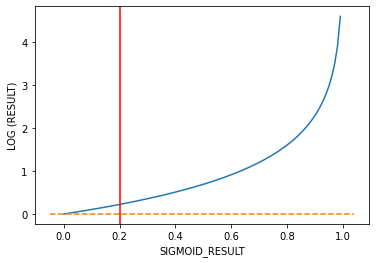

In [ ]:
#@title

draw_graph(lim=1, loss=0, x_line=True, x_intercept=0.2)

We see that the corresponding LOSS if very low (~0.3)
\
\
**Takeaways:**
- When a input is -ve, and if the model predicts with a HIGH confidence score, then it will be penalized with a HIGH COST.

- the COST/LOSS will be 0 When the model predicts a NEGATIVE input with a confidence score of 0(0%) (prediction result = Actual label = 0).
- Similarly,the COST will be the HIGHEST when the model predicts a NEGATIVE input with a confidence score of 1.

**Combining both positive and negative cases in a single loss function**

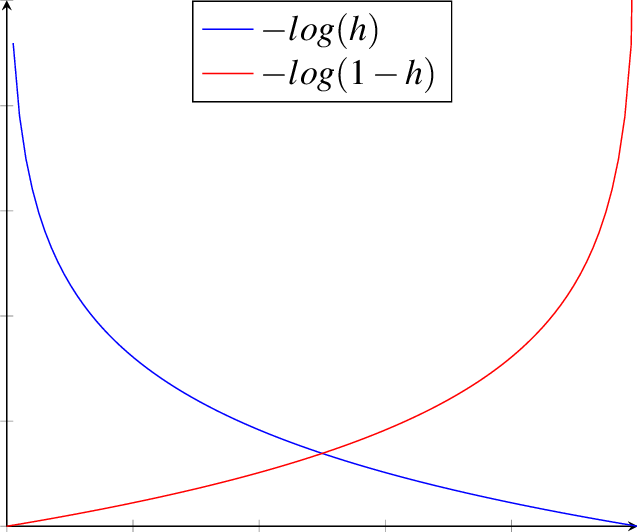

The LOSS function can then be boiled down to:
\
\
\
\
**LOSS/COST = - (Y * Log(Prediction) + (1-Y) * Log(1-Prediction) )**
\
\
Y = Actual_label
\
\
When Y=0, we eliminate the first term, and select the second term.
\
When Y=1, we eliminate the second term, and select only the first term.

We can then use **gradient descent** to optimize the loss function.